In [2]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
qc = QuantumCircuit(1)

qc.h(0)

h_ideal = qi.Operator(qc)

from qiskit.visualization import array_to_latex
array_to_latex(h_ideal)

<IPython.core.display.Latex object>

In [3]:
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo

backend = AerSimulator.from_backend(FakeVigo())

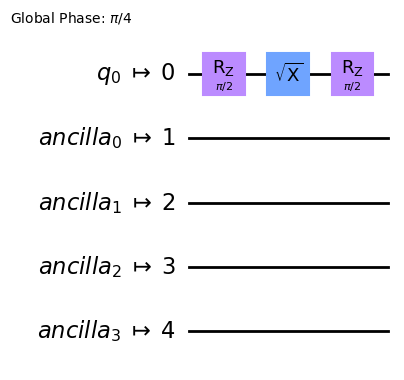

In [4]:
from qiskit import transpile
tqc = transpile(qc, backend)
tqc.draw("mpl")

In [6]:
from qiskit_experiments.library import ProcessTomography
qptexp = ProcessTomography(qc, qubits=[0])

qptdata = qptexp.run(backend) .block_for_results()
h_noisy = qptdata.analysis_results("statk").value
array_to_latex(h_noisy)

C:\Users\AssafHillel\AppData\Local\Temp\ipykernel_13028\3440440968.py:2: DeprecationWarning: ProcessTomography.__init__ keyword argument qubits is deprecated and will be removed after Qiskit Experiments 0.5. It is now replaced with physical_qubits. 
  qptexp = ProcessTomography(qc, qubits=[0])


ExperimentEntryNotFound: 'Analysis result statk not found.'

In [ ]:
f = qi.average_gate_fidelity(h_noisy, target=h_ideal)
print(f)